In [58]:
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.6, 0.8]

df = pd.DataFrame()

for alpha in alphas:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal']
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

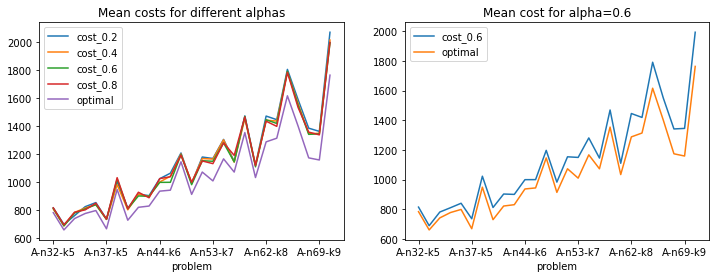

In [67]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Mean costs for different alphas")
ax[1].set_title("Mean cost for alpha=0.6")
df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.6', 'cost_0.8', 'optimal']].plot(x="problem", ax=ax[0], legend=True);
df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.6', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

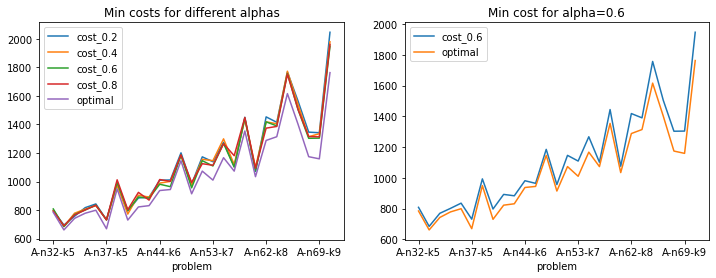

In [68]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Min costs for different alphas")
ax[1].set_title("Min cost for alpha=0.6")
df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.6', 'cost_0.8', 'optimal']].plot(x="problem", ax=ax[0], legend=True);
df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.6', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

gap_0.2    0.101968
gap_0.4    0.091022
gap_0.6    0.086551
gap_0.8    0.091880
dtype: float64


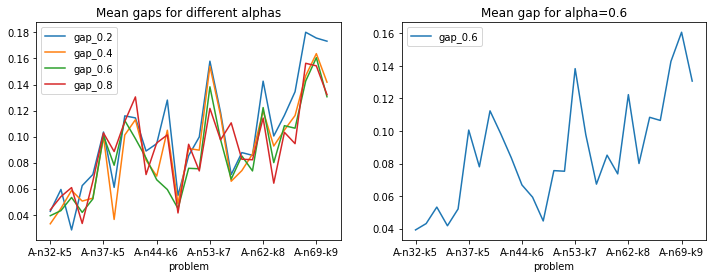

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Mean gaps for different alphas")
mean_gap = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.6', 'gap_0.8']]
mean_gap.plot(x="problem", ax=ax[0], legend=True);

ax[1].set_title("Mean gap for alpha=0.6")
mean_gap[['problem', 'gap_0.6']].plot(x="problem", ax=ax[1], legend=True);
print(mean_gap.mean(numeric_only=True))

gap_0.2    0.015306
gap_0.4    0.019133
gap_0.6    0.021186
gap_0.8    0.010204
dtype: float64


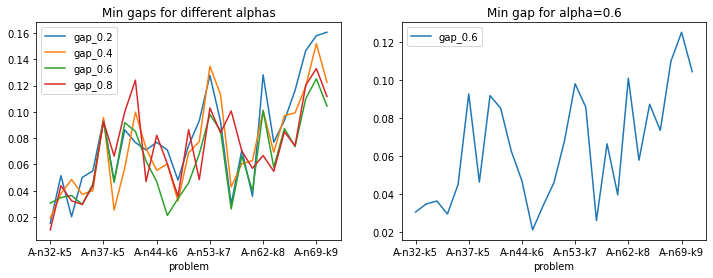

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Min gaps for different alphas")
min_gap = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.6', 'gap_0.8']]
min_gap.plot(x="problem", ax=ax[0], legend=True);

ax[1].set_title("Min gap for alpha=0.6")
min_gap[['problem', 'gap_0.6']].plot(x="problem", ax=ax[1], legend=True);
print(min_gap.min(numeric_only=True))

In [119]:
import numpy as np

local_search = pd.read_csv('data/local_search.csv', sep=';', header=None).fillna(method='ffill', axis=1).transpose().astype(int)

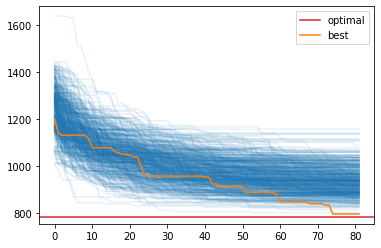

In [157]:
fig, ax = plt.subplots();

local_search.plot(ax=ax, color='tab:blue', alpha=0.1, legend=None);
local_search.transpose()[local_search.transpose()[81] == local_search.transpose()[81].min()].transpose().plot(ax=ax, color='tab:orange', label='best')
ax.axhline(y=784, color='tab:red', label='optimal');

handles, labels = ax.get_legend_handles_labels();
ax.legend(reversed(handles), ['optimal', 'best'], loc='best');
